**Let's look at a Market Basket Analysis Example**

**we are using data collected from a SuperMarket, where each row indicates all the items purchased in a particular transaction.**

**The manager of a retail store is trying to find out an association rule between items, to figure out which items are more often bought together so that he can keep the items together in order to increase sales.**

In [5]:
!pip install Apyori

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#pip install kagglehub
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("parisanahmadi/market-basket")

# print("Path to dataset files:", path)

In [4]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [6]:
transactions = []
for i in range(7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])
# transactions

**Wee will use the apriori function from the apyiori module.**

**We need to pass 6 parameters to this funcition.**

1. List of the transctions as the main input
2. Minimum Support--Let's try to set this to 3 transactions per day. This dataset contains dta collected over a week. Therefore, we will set this value to 3*7/7501=0.00279
3. Minimum confidence which we choose to be 0.2
4. Minimum Lift: we set this to 3
5. Max Length

In [7]:
from apyori import apriori

In [8]:
rules = apriori(transactions = transactions, min_support = 0.00279, min_confidence = 0.2, min_lift = 3, max_length = 3)
type(rules)

generator

In [9]:
results = list(rules)
results
print(results)

[RelationRecord(items=frozenset({'chicken', 'extra dark chocolate'}), support=0.0027996267164378083, ordered_statistics=[OrderedStatistic(items_base=frozenset({'extra dark chocolate'}), items_add=frozenset({'chicken'}), confidence=0.23333333333333334, lift=3.8894074074074076)]), RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalop

**Seems difficult to understand these assiciate rules like this**

In [10]:
print(results[2])

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])


In [11]:
print(results[2][2][0][0])
print(type(results[0][2][0][0]))

frozenset({'mushroom cream sauce'})
<class 'frozenset'>


In [12]:
def convert(results):
    lhs = [tuple(result[2][0][0]) for result in results]
    rhs = [tuple(result[2][0][1]) for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
    
resultFrame = pd.DataFrame(convert(results), columns=['Left', 'Right', 'Support', 'Confidence', 'Lift'])
resultFrame.head()

,Left,Right,Support,Confidence,Lift
0,"(extra dark chocolate,)","(chicken,)",0.002800,0.233333,3.889407
1,"(light cream,)","(chicken,)",0.004533,0.290598,4.843951
2,"(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790833
3,"(pasta,)","(escalope,)",0.005866,0.372881,4.700812
4,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.164271


In [13]:
resultFrame

,Left,Right,Support,Confidence,Lift
0,"(extra dark chocolate,)","(chicken,)",0.002800,0.233333,3.889407
1,"(light cream,)","(chicken,)",0.004533,0.290598,4.843951
2,"(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790833
3,"(pasta,)","(escalope,)",0.005866,0.372881,4.700812
4,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.164271
...,...,...,...,...,...
70,"(pasta,)","(shrimp, nan)",0.005066,0.322034,4.515096
71,"(spaghetti, pancakes)","(olive oil,)",0.005066,0.201058,3.052910
72,"(spaghetti, soup)","(olive oil,)",0.002933,0.205607,3.121987
73,"(tomatoes, olive oil)","(spaghetti,)",0.004399,0.611111,3.509912


**We can sort the final outputs in the descending order of the lift**

In [14]:
resultFrame.nlargest(n=10, columns='Lift')

,Left,Right,Support,Confidence,Lift
68,"(whole wheat pasta, mineral water)","(olive oil,)",0.003866,0.402778,6.115863
59,"(tomato sauce,)","(spaghetti, ground beef)",0.003066,0.216981,5.535971
34,"(fromage blanc,)","(honey, nan)",0.003333,0.245098,5.178818
52,"(ground beef, shrimp)","(herb & pepper,)",0.002933,0.255814,5.172131
4,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.164271
1,"(light cream,)","(chicken,)",0.004533,0.290598,4.843951
19,"(light cream,)","(chicken, nan)",0.004533,0.290598,4.843951
37,"(frozen vegetables, herb & pepper)","(ground beef,)",0.002800,0.466667,4.749616
3,"(pasta,)","(escalope,)",0.005866,0.372881,4.700812
32,"(pasta,)","(escalope, nan)",0.005866,0.372881,4.700812


**In the previous algorithm we could not see the frequent itemsets**

**Let's look at a different library for this--mlxtend**

In [19]:
dataset = pd.read_csv('basket_analysis.csv', index_col=0)
dataset

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


**Dataset contains 999 transactions. We cannot set minsupport to be too high, as it could result in not realizing interesting patterns.**

**We will set the minsupport to be 0.02**

In [16]:
!pip install mlxtend

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules
dataset

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [21]:
frequent_itemsets = apriori(dataset, min_support=0.02, use_colnames=True)

In [22]:
print(frequent_itemsets)
frequent_itemsets
print(type(frequent_itemsets))
# for i in frequent_itemsets:
#     print(i)

       support                                           itemsets
0     0.383383                                            (Apple)
1     0.384384                                            (Bread)
2     0.420420                                           (Butter)
3     0.404404                                           (Cheese)
4     0.407407                                             (Corn)
...        ...                                                ...
5540  0.020020  (Dill, Ice cream, Kidney Beans, Cheese, Onion,...
5541  0.021021  (Dill, Kidney Beans, Cheese, chocolate, Unicor...
5542  0.020020  (Ice cream, Sugar, Kidney Beans, Cheese, choco...
5543  0.020020  (chocolate, Yogurt, Unicorn, Corn, Onion, Nutmeg)
5544  0.020020  (Dill, Ice cream, Milk, chocolate, Unicorn, On...

[5545 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


**If you want to look at this dataset with the size of the itemset, you can do following:**

In [23]:
frequent_itemsets['itemset_length'] = frequent_itemsets['itemsets'].apply(len) 
frequent_itemsets

,support,itemsets,itemset_length
0,0.383383,(Apple),1
1,0.384384,(Bread),1
2,0.420420,(Butter),1
3,0.404404,(Cheese),1
4,0.407407,(Corn),1
...,...,...,...
5540,0.020020,"(Dill, Ice cream, Kidney Beans, Cheese, Onion,...",6
5541,0.021021,"(Dill, Kidney Beans, Cheese, chocolate, Unicor...",6
5542,0.020020,"(Ice cream, Sugar, Kidney Beans, Cheese, choco...",6
5543,0.020020,"(chocolate, Yogurt, Unicorn, Corn, Onion, Nutmeg)",6


**If you want to filter this frequent itemset you can do something like this**

In [24]:
frequent_itemsets[(frequent_itemsets['itemset_length'] == 2 ) & (frequent_itemsets['support']>= 0.2)] 

,support,itemsets,itemset_length
49,0.207207,"(Butter, Ice cream)",2
50,0.202202,"(Butter, Kidney Beans)",2
57,0.202202,"(Butter, chocolate)",2
62,0.200200,"(Kidney Beans, Cheese)",2
107,0.202202,"(Ice cream, chocolate)",2
120,0.211211,"(chocolate, Milk)",2


**If you waant to select entries based on the itemsets you can do the following:**

In [25]:
frequent_itemsets[(frequent_itemsets['itemsets'] == {'Ice cream', 'chocolate'} ) ] 

,support,itemsets,itemset_length
107,0.202202,"(Ice cream, chocolate)",2


In [26]:
rules = association_rules(frequent_itemsets, metric="lift", num_itemsets=len(frequent_itemsets), min_threshold=1) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,1.0,0.006788,1.029482,0.071524,0.251223,0.028637,0.401565
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,1.0,0.006788,1.029610,0.071407,0.251223,0.028759,0.401565
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,1.0,0.027006,1.116289,0.247602,0.305691,0.104174,0.469240
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,1.0,0.027006,1.138354,0.232730,0.305691,0.121538,0.469240
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,1.0,0.007120,1.029393,0.073721,0.259200,0.028554,0.411983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119413,(Ice cream),"(Dill, Milk, chocolate, Unicorn, Onion)",0.410410,0.035035,0.020020,0.048780,1.392334,1.0,0.005641,1.014450,0.477929,0.047059,0.014245,0.310105
119414,(Milk),"(Dill, Ice cream, chocolate, Unicorn, Onion)",0.405405,0.031031,0.020020,0.049383,1.591398,1.0,0.007440,1.019305,0.625000,0.048077,0.018939,0.347272
119415,(chocolate),"(Dill, Ice cream, Milk, Unicorn, Onion)",0.421421,0.029029,0.020020,0.047506,1.636498,1.0,0.007787,1.019398,0.672232,0.046512,0.019029,0.368581
119416,(Unicorn),"(Dill, Ice cream, Milk, chocolate, Onion)",0.389389,0.032032,0.020020,0.051414,1.605077,1.0,0.007547,1.020432,0.617377,0.049875,0.020023,0.338207


In [28]:
rules['itemset_size'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)
# Combine antecedents and consequents into a single string for labels
rules['itemset'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules.sort_values(by="lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size,itemset
118584,"(Cheese, Unicorn, Apple)","(Corn, Kidney Beans, Sugar)",0.075075,0.090090,0.022022,0.293333,3.256000,1.0,0.015259,1.287608,0.749115,0.153846,0.223366,0.268889,6,"Cheese, Unicorn, Apple -> Corn, Kidney Beans, ..."
118577,"(Corn, Kidney Beans, Sugar)","(Cheese, Unicorn, Apple)",0.090090,0.075075,0.022022,0.244444,3.256000,1.0,0.015259,1.224165,0.761476,0.153846,0.183117,0.268889,6,"Corn, Kidney Beans, Sugar -> Cheese, Unicorn, ..."
118461,"(Bread, Unicorn, Apple)","(Corn, Yogurt, Sugar)",0.076076,0.085085,0.020020,0.263158,3.092879,1.0,0.013547,1.241670,0.732394,0.141844,0.194633,0.249226,6,"Bread, Unicorn, Apple -> Corn, Yogurt, Sugar"
118452,"(Corn, Yogurt, Sugar)","(Bread, Unicorn, Apple)",0.085085,0.076076,0.020020,0.235294,3.092879,1.0,0.013547,1.208208,0.739606,0.141844,0.172328,0.249226,6,"Corn, Yogurt, Sugar -> Bread, Unicorn, Apple"
119205,"(chocolate, Kidney Beans, Onion)","(Dill, Cheese, Unicorn)",0.083083,0.082082,0.021021,0.253012,3.082427,1.0,0.014201,1.228826,0.736796,0.145833,0.186215,0.254555,6,"chocolate, Kidney Beans, Onion -> Dill, Cheese..."
119196,"(Dill, Cheese, Unicorn)","(chocolate, Kidney Beans, Onion)",0.082082,0.083083,0.021021,0.256098,3.082427,1.0,0.014201,1.232577,0.735992,0.145833,0.188692,0.254555,6,"Dill, Cheese, Unicorn -> chocolate, Kidney Bea..."
118564,"(Corn, Kidney Beans, Unicorn, Sugar)","(Cheese, Apple)",0.046046,0.162162,0.022022,0.478261,2.949275,1.0,0.014555,1.605856,0.692836,0.118280,0.377279,0.307032,6,"Corn, Kidney Beans, Unicorn, Sugar -> Cheese, ..."
118597,"(Cheese, Apple)","(Corn, Kidney Beans, Unicorn, Sugar)",0.162162,0.046046,0.022022,0.135802,2.949275,1.0,0.014555,1.103861,0.788856,0.118280,0.094089,0.307032,6,"Cheese, Apple -> Corn, Kidney Beans, Unicorn, ..."
118475,"(Bread, Apple)","(Corn, Yogurt, Unicorn, Sugar)",0.154154,0.044044,0.020020,0.129870,2.948642,1.0,0.013230,1.098636,0.781302,0.112360,0.089780,0.292208,6,"Bread, Apple -> Corn, Yogurt, Unicorn, Sugar"
118438,"(Corn, Yogurt, Unicorn, Sugar)","(Bread, Apple)",0.044044,0.154154,0.020020,0.454545,2.948642,1.0,0.013230,1.550717,0.691309,0.112360,0.355137,0.292208,6,"Corn, Yogurt, Unicorn, Sugar -> Bread, Apple"


**We can try to visualize this result as follows**

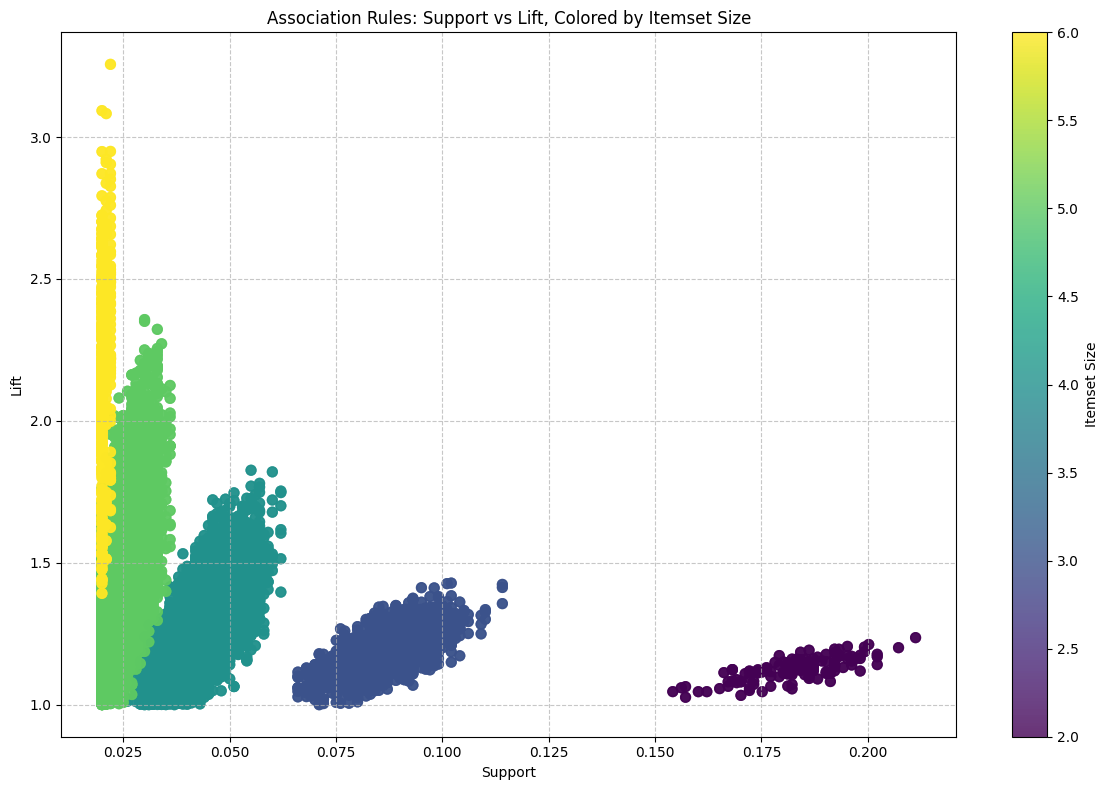

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
scatter = plt.scatter(
    rules['support'],
    rules['lift'],
    c=rules['itemset_size'],
    cmap='viridis',
    alpha=0.8,
    s=50
)


cbar=plt.colorbar(scatter, label='Itemset Size')
# cbar.set_ticks(list(range(2, rules['itemset_size'].max() +1)))

plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules: Support vs Lift, Colored by Itemset Size')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  #Adjusts the plot parameters to prevent labels from overlapping or being cut off.


**Let's do bit of advanced manipulation**

In [30]:
average_metrics = rules.groupby('itemset_size').agg({'support': 'mean', 'lift':'mean'}).reset_index()
average_metrics

,itemset_size,support,lift
0,2,0.183040,1.124878
1,3,0.088109,1.194679
2,4,0.043649,1.263255
3,5,0.023639,1.393657
4,6,0.020395,2.139912


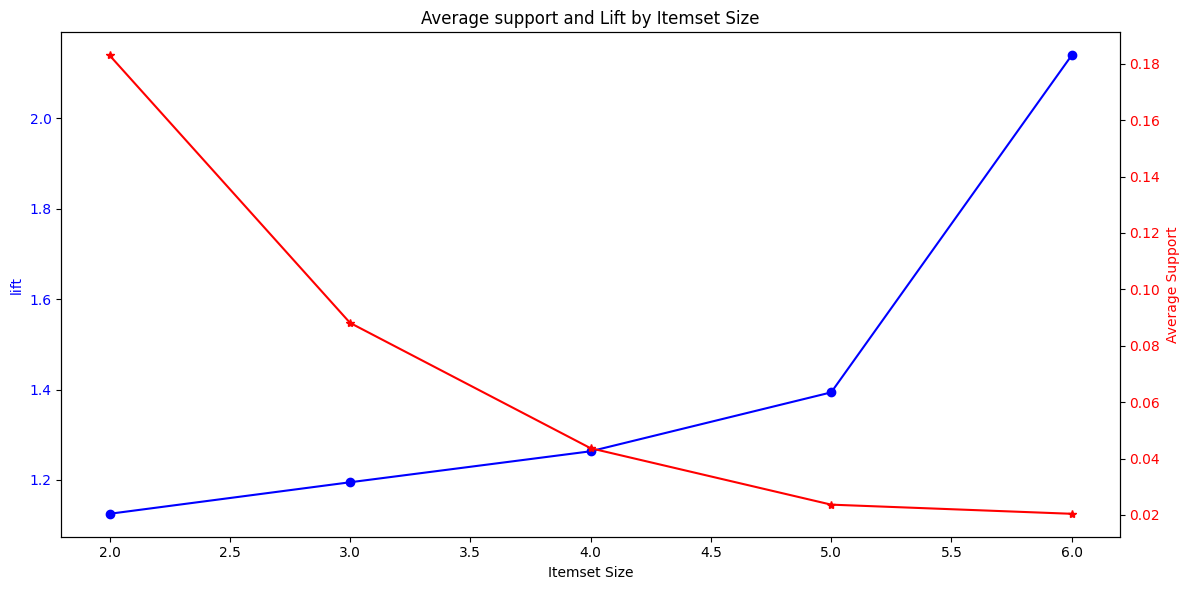

In [31]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(average_metrics['itemset_size'], average_metrics['lift'], marker = 'o', color='b', label='Average Lift')
ax1.set_xlabel('Itemset Size')
ax1.set_ylabel('lift', color='b')
# if you want to put some color on the y-axis of the ax1
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(average_metrics['itemset_size'], average_metrics['support'], marker='*', color='r', label='Average Support')
ax2.set_ylabel('Average Support', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Average support and Lift by Itemset Size')
fig.tight_layout()

Support decreases: Larger itemsets (containing more items) are less frequent, as it's rarer for multiple specific items to be purchased together.

Lift increases: Larger itemsets often have higher lift, indicating stronger associations among the items within those sets when they do occur.

**Now let's see the best set of rules that we have**

In [32]:
rules_sorted = rules.sort_values(by=['itemset_size', 'lift', 'support'], ascending=[True, False, False])
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size,itemset
207,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088,2,Milk -> chocolate
206,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,1.0,0.040365,1.192021,0.330310,0.343089,0.161088,0.511088,2,chocolate -> Milk
92,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,1.0,0.035038,1.168284,0.295838,0.326797,0.144043,0.492623,2,Kidney Beans -> Cheese
93,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,1.0,0.035038,1.171583,0.293849,0.326797,0.146454,0.492623,2,Cheese -> Kidney Beans
208,(Onion),(Nutmeg),0.403403,0.401401,0.195195,0.483871,1.205454,1.0,0.033269,1.159785,0.285682,0.320197,0.137771,0.485078,2,Onion -> Nutmeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119292,(chocolate),"(Ice cream, Sugar, Kidney Beans, Cheese, Nutmeg)",0.421421,0.033033,0.020020,0.047506,1.438134,1.0,0.006099,1.015195,0.526557,0.046083,0.014967,0.326783,6,"chocolate -> Ice cream, Sugar, Kidney Beans, C..."
119352,(Unicorn),"(chocolate, Yogurt, Corn, Onion, Nutmeg)",0.389389,0.036036,0.020020,0.051414,1.426735,1.0,0.005988,1.016211,0.489836,0.049383,0.015953,0.303485,6,"Unicorn -> chocolate, Yogurt, Corn, Onion, Nutmeg"
119297,"(chocolate, Yogurt, Corn, Onion, Nutmeg)",(Unicorn),0.036036,0.389389,0.020020,0.555556,1.426735,1.0,0.005988,1.373874,0.310280,0.049383,0.272131,0.303485,6,"chocolate, Yogurt, Corn, Onion, Nutmeg -> Unicorn"
119413,(Ice cream),"(Dill, Milk, chocolate, Unicorn, Onion)",0.410410,0.035035,0.020020,0.048780,1.392334,1.0,0.005641,1.014450,0.477929,0.047059,0.014245,0.310105,6,"Ice cream -> Dill, Milk, chocolate, Unicorn, O..."


In [33]:
top_rules = rules_sorted.groupby('itemset_size').head(1).reset_index(drop=True)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size,itemset
0,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088,2,Milk -> chocolate
1,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,1.0,0.030628,1.407968,0.364570,0.213389,0.289757,0.414686,3,"Dill, Cheese -> Onion"
2,"(Dill, Cheese)","(Kidney Beans, Onion)",0.177177,0.170170,0.055055,0.310734,1.826022,1.0,0.024905,1.203933,0.549768,0.188356,0.169389,0.317132,4,"Dill, Cheese -> Kidney Beans, Onion"
3,"(Eggs, Unicorn, Apple)","(Corn, Sugar)",0.068068,0.187187,0.030030,0.441176,2.356873,1.0,0.017289,1.454507,0.617759,0.133333,0.312482,0.300802,5,"Eggs, Unicorn, Apple -> Corn, Sugar"
4,"(Corn, Kidney Beans, Sugar)","(Cheese, Unicorn, Apple)",0.090090,0.075075,0.022022,0.244444,3.256000,1.0,0.015259,1.224165,0.761476,0.153846,0.183117,0.268889,6,"Corn, Kidney Beans, Sugar -> Cheese, Unicorn, ..."


**______________________________________________________________________**

**There is a nice way to create a binary database using mlxtend**

In [34]:
dataset_market = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
dataset_market.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder() # to transform dataset into binary matrix
# we need to input a list of lists to this encoder
list_of_lists = dataset_market.apply(lambda row: [item for item in row.dropna()], axis=1).tolist()
# print(list_of_lists)

te_transformed = te.fit(list_of_lists).transform(list_of_lists)
df = pd.DataFrame(te_transformed, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
